## 2. Feladatsor 

Fibonacci-számok:

\begin{align}
F_0 &= 0 \\ 
F_1 &= 1 \\
F_{n+2} &= F_{n} + F_{n+1} \quad (n \in \mathbb{N})
\end{align}

### 0.feladat: Egy kis ismétlés (ciklusok)

Írjunk for-ciklus alapú függvényt $F_n$ kiszámítására.

In [1]:
function b = fibonacci(n)
    if n <= 0
        b = 0;
        return;
    end
    
    a = 0; b = 1;
    for k=2:n
        c = a;
        a = b;
        b = b + c;
    end
end

In [2]:
function b = fibonacci(n)
   if n <= 0
      b = 0; 
      return
   end
   
   [a, b] = {0, 1}{:};
   for k=2:n
       % a, b = b, a+b
       [a, b] = {b, a+b}{:};
   end
end

In [3]:
fibonacci(1)

ans =  1


futásidő meghatározása

In [4]:
tic
fibonacci(10)
toc

ans =  55
Elapsed time is 0.00455213 seconds.


### 1.feladat: Rekurzió

Írjunk rekurzív függvényt $F_n$ kiszámítására.

In [5]:
function fn = fibonacci(n)
   if n <= 0
      fn = 0
   elseif n == 1
      fn = 1
   else
      fn = fibonacci(n-1) + fibonacci(n-2)
   end
end

In [6]:
fibonacci(4)

fn =  1
fn = 0
fn =  1
fn =  1
fn =  2
fn =  1
fn = 0
fn =  1
fn =  3
ans =  3


Vizsgáljuk meg, hogy hány függvényhívás történt. Milyen számsorozatot tapasztalunk? Mi ennek a magyarázata?

In [7]:
function counts = fibonacci_cc(n)
    counts = zeros(1, n+1);
    
    function fn = fibonacci(n)
       counts(n+1) += 1;
       if n <= 0
          fn = 0;
       elseif n == 1
          fn = 1;
       else
          fn = fibonacci(n-1) + fibonacci(n-2);
       end
    end
    fibonacci(n);
end

In [8]:
fibonacci_cc(10)

ans =

   34   55   34   21   13    8    5    3    2    1    1



Ábrázoljuk a kapott számokat.

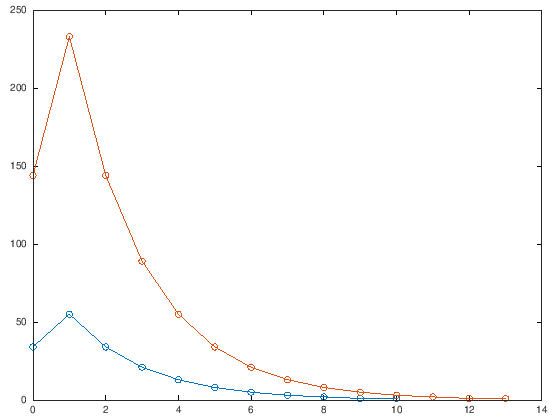

In [9]:
plot(0:10, fibonacci_cc(10), 'o-'); hold on
plot(0:13, fibonacci_cc(13), 'o-')

Mentsük meg a rekurzív megoldást!

In [10]:
function fn = fibonacci_cached(n)
    fibs = - ones(1, n+1);
    fibs(0 +1) = 0;
    fibs(1 +1) = 1;
    
    function fn = fibonacci(n)
       if fibs(n) == -1
           fn = fibonacci(n-1) + fibonacci(n-2);
           fibs(n) = fn;
       else
           fn = fibs(n);
       end
    end
    
    fn = fibonacci(n);
end

In [11]:
tic
fibonacci_cached(100)
toc

ans =    2.1892e+20
Elapsed time is 0.0101421 seconds.


In [12]:
function wrapped = simple_cacher(cache, fun)
    
    function r = wrapped_fun(n)
        if isKey(n, cache)
            r = cache(n);
        else
            r = fun(n);
            cache(n) = r;
        end
    end
    wrapped = @wrapped_fun;
end

% python: @lru_cache

In [13]:
fibonacci_sc = simple_cacher(containers.Map('KeyType','int32','ValueType','int64'),
                             @fibonacci)

error: handles to nested functions are not yet supported
error: called from
    simple_cacher at line 9 column 13


Talán egyszer...

### 2.feladat: Mátrixok, zárt formula

Számítsuk ki az $F_n$ értéket mátrixok segítségével.

In [14]:
A = [1 1
     1 0]
x = [1
     0]

A =

   1   1
   1   0

x =

   1
   0



In [15]:
A^6 * x

ans =

   13
    8



gyors hatvanyozas: $A^{2^k}$

In [16]:
% 6 = 2 + 4
% A^6 = A^2 * A^4

Diagonalizáljuk a megfelelő mátrixot, majd ebből vezessük le $F_n$ zárt képletét, végül írjunk programot, ami ezen képlet segitségével kiszámítja $F_n$ értékét.

In [17]:
[V, LAM] = eig(A)

V =

   0.52573  -0.85065
  -0.85065  -0.52573

LAM =

Diagonal Matrix

  -0.61803         0
         0   1.61803



In [18]:
(1- sqrt(5))/2, (1 + sqrt(5))/2

ans = -0.61803
ans =  1.6180


In [19]:
A^6
inv(V) * LAM^6 * V

V \ LAM^6 * V

ans =

   13    8
    8    5

ans =

   13.0000    8.0000
    8.0000    5.0000

ans =

   13.0000    8.0000
    8.0000    5.0000



In [20]:
A
V
inv(V)

A =

   1   1
   1   0

V =

   0.52573  -0.85065
  -0.85065  -0.52573

ans =

   0.52573  -0.85065
  -0.85065  -0.52573



In [21]:
V \ LAM^6 * (V * [1; 0])

ans =

   13.0000
    8.0000



In [22]:
V(1:1, 1:end) * LAM^6 * V * [1;0]

ans =  13.000


In [23]:
V(1, :) * LAM^6 * V(:, 1)

% v' * D * v

ans =  13.000


In [24]:
LAM(1,1)^6 * V(1,1)^2 + LAM(2,2)^6 * V(1,2)^2

ans =  13.000


In [25]:
function fn = closedfib(n)

end

In [26]:
tic
closedfib(100)
toc

Elapsed time is 0.0119221 seconds.
